In [1]:
import matplotlib  
print(matplotlib.get_backend())    #返回matplotlib的后端
print(matplotlib.get_cachedir())   #缓存目录
print(matplotlib.get_configdir())  #配置目录
print(matplotlib.get_data_path())  #数据路径
print(matplotlib.get_home())
import matplotlib.pyplot as plt
import matplotlib as mpl
%matplotlib inline
plt.rcParams['font.family'] = 'SimHei'
plt.rcParams['axes.unicode_minus']=False

module://ipykernel.pylab.backend_inline
C:\Users\sssimonyang\.matplotlib
C:\Users\sssimonyang\.matplotlib
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\mpl-data
C:\Users\sssimonyang


In [2]:
import pandas as pd
data=pd.read_excel("2018免研名单.xlsx")
print(data.shape)
data["备注"].unique()

(1197, 9)


array([nan, '中法4+4', '辅导员', '竞赛直免', '支教'], dtype=object)

In [3]:
groups=data.groupby(data["专业名称"]).groups
colleges=[]
majors=[]
renshu=[]
zongbaoyan_renshu=[]
normal_baoyan=[]
paiming=[]
qita=[]
zhongfa=[]
fudaoyuan=[]
zhijiao=[]
zhimian=[]
houbei=[]
for major in groups:
    index=groups[major]
    major_data=data.loc[index]
    majors.append(major)
    colleges.append(major_data.iloc[0]["学院"])
    renshu.append(major_data.iloc[0]["专业人数"])
    houbei.append(major_data["是否后备"].count())
    major_data=major_data[major_data["是否后备"].isna()]
    zongbaoyan_renshu.append(major_data["序号"].count())
    zhongfa.append(major_data[major_data["备注"]=="中法4+4"]["序号"].count())
    fudaoyuan.append(major_data[major_data["备注"]=="辅导员"]["序号"].count())
    zhijiao.append(major_data[major_data["备注"]=="支教"]["序号"].count())
    zhimian.append(major_data[major_data["备注"]=="直免"]["序号"].count())
    qita.append(major_data["备注"].count())
    major_true_data=major_data[major_data["备注"].isna()]
    normal_baoyan.append(major_true_data["序号"].count())
    paiming.append(major_true_data["排名"].max())
df=pd.DataFrame({"学院":colleges,"专业":majors,"参加排名人数":renshu,"总保研人数":zongbaoyan_renshu,"除中法辅导员支教直免保研人数":normal_baoyan,"除中法辅导员支教直免最低排名":paiming,
                 "中法辅导员支教直免总保研人数":qita,"中法":zhongfa,"辅导员":fudaoyuan,"支教":zhijiao,"直免":zhimian,"后备":houbei})
df["总保研率"]=df["总保研人数"]/df["参加排名人数"]
df["除中法辅导员支教直免保研率"]=df["除中法辅导员支教直免保研人数"]/df["参加排名人数"]
df["总保研注释"]=df['总保研人数'].astype(str).str.cat(df['参加排名人数'].astype(str),sep="/")
df["保研注释"]=df['除中法辅导员支教直免保研人数'].astype(str).str.cat(df['参加排名人数'].astype(str),sep="/")
df.head()

,学院,专业,参加排名人数,总保研人数,除中法辅导员支教直免保研人数,除中法辅导员支教直免最低排名,中法辅导员支教直免总保研人数,中法,辅导员,支教,直免,后备,总保研率,除中法辅导员支教直免保研率,总保研注释,保研注释
0,运输,交通工程,76,13,12,14,1,0,0,1,0,3,0.171053,0.157895,13/76,12/76
1,运输,交通运输,193,42,40,53,2,1,1,0,0,1,0.217617,0.207254,42/193,40/193
2,运输,交通运输(城市轨道交通),4,1,1,1,0,0,0,0,0,0,0.250000,0.250000,1/4,1/4
3,茅院,交通运输类(茅以升学院),30,19,17,18,2,1,0,1,0,4,0.633333,0.566667,19/30,17/30
4,建筑,产品设计,64,7,7,9,0,0,0,0,0,0,0.109375,0.109375,7/64,7/64


In [4]:
df18=df
df18.to_excel("2018保研率.xls")

In [5]:
import pandas as pd
data=pd.read_excel("2019免研名单.xlsx")
print(data.shape)
data["备注"].unique()

(1182, 9)


array([nan, '辅导员', '直免', '中法4+4', '支教'], dtype=object)

In [6]:
groups=data.groupby(data["专业"]).groups
colleges=[]
majors=[]
renshu=[]
zongbaoyan_renshu=[]
normal_baoyan=[]
paiming=[]
qita=[]
zhongfa=[]
fudaoyuan=[]
zhijiao=[]
zhimian=[]
houbei=[]
for major in groups:
    index=groups[major]
    major_data=data.loc[index]
    majors.append(major)
    colleges.append(major_data.iloc[0]["学院"])
    renshu.append(major_data.iloc[0]["人数"])
    houbei.append(major_data["是否后备"].count())
    major_data=major_data[major_data["是否后备"].isna()]
    zongbaoyan_renshu.append(major_data["序号"].count())
    zhongfa.append(major_data[major_data["备注"]=="中法4+4"]["序号"].count())
    fudaoyuan.append(major_data[major_data["备注"]=="辅导员"]["序号"].count())
    zhijiao.append(major_data[major_data["备注"]=="支教"]["序号"].count())
    zhimian.append(major_data[major_data["备注"]=="直免"]["序号"].count())
    qita.append(major_data["备注"].count())
    major_true_data=major_data[major_data["备注"].isna()]
    normal_baoyan.append(major_true_data["序号"].count())
    paiming.append(major_true_data["排名"].max())
df=pd.DataFrame({"学院":colleges,"专业":majors,"参加排名人数":renshu,"总保研人数":zongbaoyan_renshu,"除中法辅导员支教直免保研人数":normal_baoyan,"除中法辅导员支教直免最低排名":paiming,
                 "中法辅导员支教直免总保研人数":qita,"中法":zhongfa,"辅导员":fudaoyuan,"支教":zhijiao,"直免":zhimian,"后备":houbei})
df["总保研率"]=df["总保研人数"]/df["参加排名人数"]
df["除中法辅导员支教直免保研率"]=df["除中法辅导员支教直免保研人数"]/df["参加排名人数"]
df["总保研注释"]=df['总保研人数'].astype(str).str.cat(df['参加排名人数'].astype(str),sep="/")
df["保研注释"]=df['除中法辅导员支教直免保研人数'].astype(str).str.cat(df['参加排名人数'].astype(str),sep="/")
df.head()

,学院,专业,参加排名人数,总保研人数,除中法辅导员支教直免保研人数,除中法辅导员支教直免最低排名,中法辅导员支教直免总保研人数,中法,辅导员,支教,直免,后备,总保研率,除中法辅导员支教直免保研率,总保研注释,保研注释
0,运输,交通工程,83,8,8,11,0,0,0,0,0,0,0.096386,0.096386,8/83,8/83
1,运输,交通运输,192,41,38,41,3,1,2,0,0,2,0.213542,0.197917,41/192,38/192
2,茅院,交通运输类(茅以升学院),28,17,17,18,0,0,0,0,0,0,0.607143,0.607143,17/28,17/28
3,运输,交通运输（詹天佑学院）,30,17,15,18,2,1,1,0,0,0,0.566667,0.500000,17/30,15/30
4,建筑,产品设计,64,11,9,13,2,0,2,0,0,1,0.171875,0.140625,11/64,9/64


In [7]:
df19=df
df19.to_excel('2019保研率.xls')

In [8]:
import pandas as pd
data=pd.read_excel("2020免研名单.xlsx")
print(data.shape)
data["备注"].unique()

(1362, 8)


array([nan, '支教', '辅导员', '中法4+4', '竞赛直免', '一流学科', '牵引定向指标', 'CAD中心'],
      dtype=object)

In [9]:
groups=data.groupby(data["专业"]).groups
colleges=[]
majors=[]
renshu=[]
zongbaoyan_renshu=[]
baoyan=[]
normal_baoyan=[]
xiaonei_baoyan=[]
paiming=[]
qita=[]
zhongfa=[]
fudaoyuan=[]
zhijiao=[]
zhimian=[]
houbei=[]
for major in groups:
    index=groups[major]
    major_data=data.loc[index]
    majors.append(major)
    colleges.append(major_data.iloc[0]["学院"])
    renshu.append(major_data.iloc[0]["专业人数"])
    houbei.append(major_data["是否后备"].count())
    major_data=major_data[major_data["是否后备"].isna()]
    zongbaoyan_renshu.append(major_data["学号"].count())
    zhongfa.append(major_data[major_data["备注"]=="中法4+4"]["学号"].count())
    fudaoyuan.append(major_data[major_data["备注"]=="辅导员"]["学号"].count())
    zhijiao.append(major_data[major_data["备注"]=="支教"]["学号"].count())
    zhimian.append(major_data[major_data["备注"]=="竞赛直免"]["学号"].count())
    xiaonei_baoyan.append(major_data[major_data["备注"].isin(['一流学科','牵引定向指标','CAD中心'])]["学号"].count())
    qita.append(major_data[major_data["备注"].isin(['中法4+4','辅导员','支教',"竞赛直免"])]["学号"].count())
    major_true_data=major_data[major_data["备注"].isna()]
    normal_baoyan.append(major_true_data["学号"].count())
    major_true_data=major_data[major_data["备注"].isna() | major_data["备注"].isin(['一流学科','牵引定向指标','CAD中心'])]
    baoyan.append(major_true_data["学号"].count())
    paiming.append(major_true_data["排名"].max())
df=pd.DataFrame({"学院":colleges,"专业":majors,"参加排名人数":renshu,"总保研人数":zongbaoyan_renshu,"除中法辅导员支教直免保研人数":baoyan,"非强制校内":normal_baoyan,'强制校内':xiaonei_baoyan,"除中法辅导员支教直免最低排名":paiming,
                 "中法辅导员支教直免总保研人数":qita,"中法":zhongfa,"辅导员":fudaoyuan,"支教":zhijiao,"直免":zhimian,"后备":houbei})
df["总保研率"]=df["总保研人数"]/df["参加排名人数"]
df["除中法辅导员支教直免保研率"]=df["除中法辅导员支教直免保研人数"]/df["参加排名人数"]
df["非强制校内保研率"]=df["非强制校内"]/df["参加排名人数"]
df["总保研注释"]=df['总保研人数'].astype(str).str.cat(df['参加排名人数'].astype(str),sep="/")
df["保研注释"]=df['除中法辅导员支教直免保研人数'].astype(str).str.cat(df['参加排名人数'].astype(str),sep="/")
df.head()

,学院,专业,参加排名人数,总保研人数,除中法辅导员支教直免保研人数,非强制校内,强制校内,除中法辅导员支教直免最低排名,中法辅导员支教直免总保研人数,中法,辅导员,支教,直免,后备,总保研率,除中法辅导员支教直免保研率,非强制校内保研率,总保研注释,保研注释
0,运输,交通工程,70,12,10,10,0,12,2,1,1,0,0,1,0.171429,0.142857,0.142857,12/70,10/70
1,机械,交通设备与控制工程,156,24,24,12,12,30,0,0,0,0,0,0,0.153846,0.153846,0.076923,24/156,24/156
2,运输,交通运输,220,45,42,42,0,45,3,0,1,1,1,5,0.204545,0.190909,0.190909,45/220,42/220
3,运输,交通运输(城市轨道交通),82,14,13,13,0,16,1,0,1,0,0,2,0.170732,0.158537,0.158537,14/82,13/82
4,茅院,交通运输类(茅以升学院),35,19,13,13,0,13,6,4,0,0,2,0,0.542857,0.371429,0.371429,19/35,13/35


In [10]:
df20=df
df20.to_excel("2020保研率.xls")

In [11]:
print(set(df19["学院"])-set(df18["学院"]))
print(set(df18["学院"])-set(df19["学院"]))
print(set(df20["学院"])-set(df19["学院"]))
print(set(df19["学院"])-set(df20["学院"]))
print(set(df18["学院"]) & set(df19["学院"]) & set(df20["学院"]))
print(set(df18["学院"]) | set(df19["学院"]) | set(df20["学院"]))

set()
set()
{'利兹', '马院'}
set()
{'人文', '外语', '土木', '力学', '数学', '经管', '生命', '电气', '材料', '物理', '心理', '公共', '机械', '茅院', '信息', '地学', '建筑', '运输'}
{'外语', '心理', '信息', '运输', '马院', '土木', '生命', '建筑', '物理', '力学', '数学', '电气', '机械', '地学', '利兹', '人文', '经管', '公共', '材料', '茅院'}


19比18相同  
20比19增加利兹和马原  

In [12]:
print(set(df19["专业"])-set(df18["专业"]))
print(set(df18["专业"])-set(df19["专业"]))

{'制药工程(化学制药)', '交通运输（詹天佑学院）', '生物工程(生物学)', '制药工程(中药制药)', '数学与应用数学(茅以升学院)', '生物工程(生物制药)', '汉语言文学(茅以升学院)', '金融学(茅以升学院)', '生物工程(生物信息)'}
{'生物工程', '制药工程', '工业工程', '电子商务', '生物工程(中外合作办学)', '交通运输(城市轨道交通)'}


'生物工程(中外合作办学)'，18有保研名额，19、20无  
'生物工程'，19开始分方向，'生物工程(生物学)', '生物工程(生物信息)'，'生物工程(生物制药)'  
'制药工程'，19开始分方向，'制药工程(化学制药)'，'制药工程(中药制药)'  
'交通运输（城市轨道）'，18届有，19届无，20届有 
'工业工程'属机械类专业，18届有，19届无，20届有
'电子商务'，14级18届最后一届  
 '数学与应用数学(茅以升学院)', '汉语言文学(茅以升学院)', '金融学(茅以升学院)'，'交通运输（詹天佑学院）' 增设  

In [13]:
print(set(df20["专业"])-set(df19["专业"]))
print(set(df19["专业"])-set(df20["专业"]))

{'网络工程(铁道信号)', '电子信息工程', '计算机科学与技术(利兹)', '英语(商务英语)', '电气工程及其自动化(城轨交通电气化)', '机械设计制造及其自动化(利兹)', '工业工程', '道路桥梁与渡河工程', '电子信息工程(利兹)', '城市地下空间工程', '交通设备与控制工程', '交通运输(城市轨道交通)', '电气工程及其自动化(功率半导体器件及应用)', '土木工程(利兹)', '工程力学跨学科试点班', '思想政治教育', '铁道工程'}
{'电子信息工程(计算机信息处理)', '电子信息工程(电子测控技术)'}


'铁道工程', '交通运输(城市轨道交通)'，'电气工程及其自动化(城轨交通电气化)', '道路桥梁与渡河工程'，'英语(商务英语)'，'城市地下空间工程' '交通设备与控制工程' '网络工程(铁道信号)' 峨眉专业  
'工业工程' 机械类专业  
'思想政治教育' 马院专业  
'工程力学跨学科试点班' 工程力学分开计算排名  
'机械设计制造及其自动化(利兹)'，'电子信息工程(利兹)'，'计算机科学与技术(利兹)','土木工程(利兹)'，'机械设计制造及其自动化(利兹)'  
'电子信息工程'不分方向  
'电气工程及其自动化(功率半导体器件及应用)' 新开方向

In [14]:
df18=df18.set_index("专业")
df19=df19.set_index("专业")
df20=df20.set_index("专业")
index = list(set(df18.index) & set(df19.index) & set(df20.index))

In [15]:
zhuanye18=df18.loc[index,['总保研率','总保研注释']]
zhuanye19=df19.loc[index,['总保研率','总保研注释']]
zhuanye20=df20.loc[index,['总保研率','总保研注释']]
data = pd.concat([zhuanye18,zhuanye19,zhuanye20],axis=1)
data.columns=['18届','18届注释','19届','19届注释','20届','20届注释']

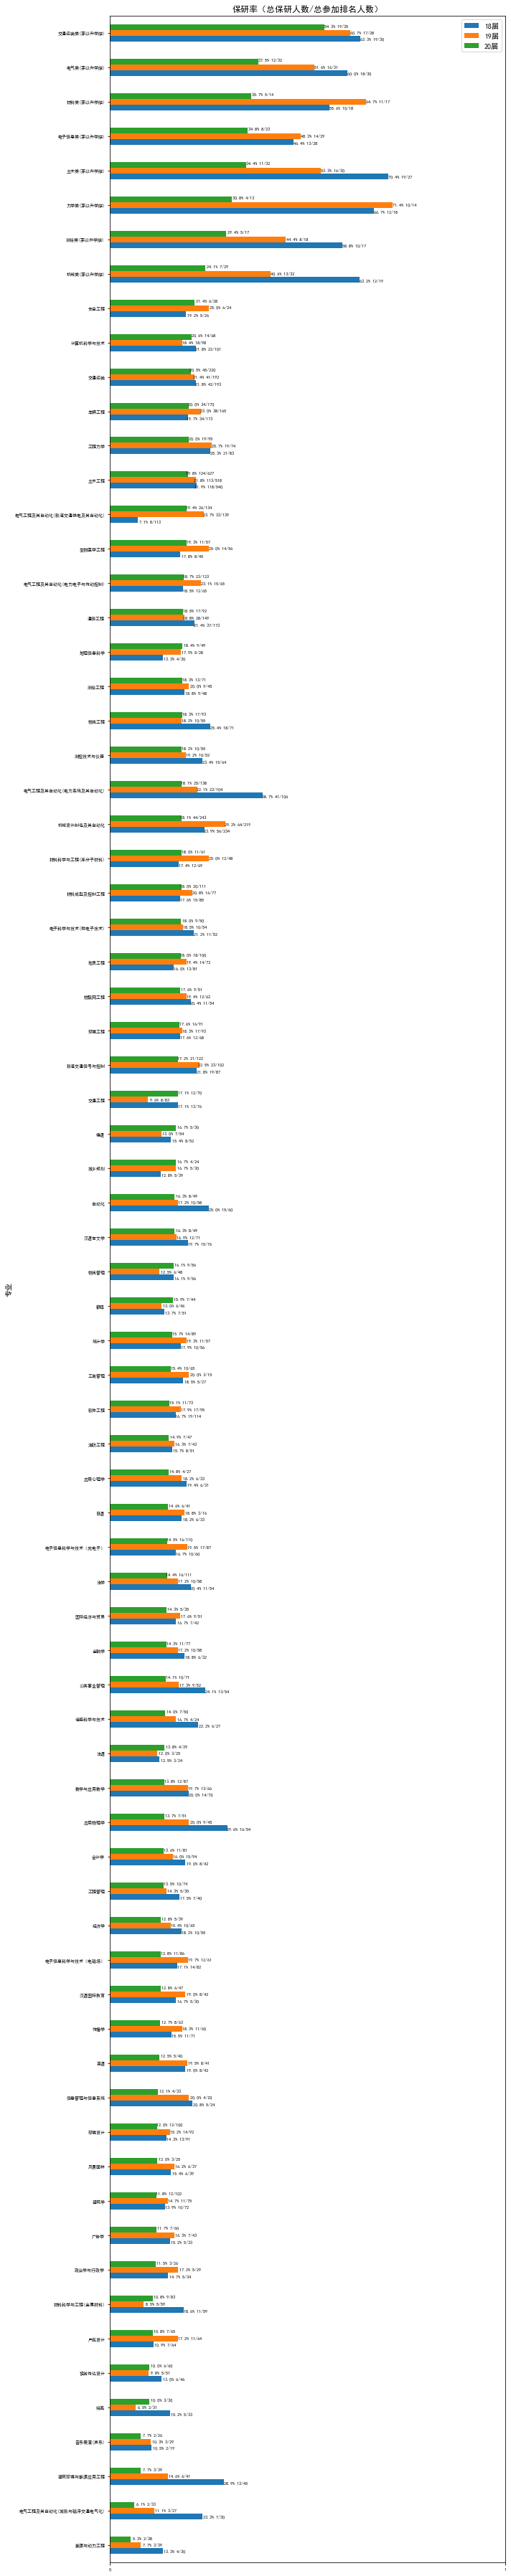

In [16]:
data.sort_values("20届",inplace=True)
ax=data[["18届","19届","20届"]].plot(kind='barh',xticks=[0,1],figsize=(10, 50),fontsize=6,title="保研率（总保研人数/总参加排名人数）")
for i,value,annotation in zip(range(data.shape[0]),data['18届'],data['18届注释']):
    plt.text(value+0.03,i-0.2 , "{:.1f}% {}".format(value*100,annotation), ha='center', va= 'center',fontsize=6)
for i,value,annotation in zip(range(data.shape[0]),data['19届'],data['19届注释']):
    plt.text(value+0.03,i , "{:.1f}% {}".format(value*100,annotation), ha='center', va= 'center',fontsize=6)
for i,value,annotation in zip(range(data.shape[0]),data['20届'],data['20届注释']):
    plt.text(value+0.03,i+0.2 , "{:.1f}% {}".format(value*100,annotation), ha='center', va= 'center',fontsize=6)
plt.tight_layout()
ax.get_figure().savefig("原图/各专业总保研18-20届.png",dpi=300)

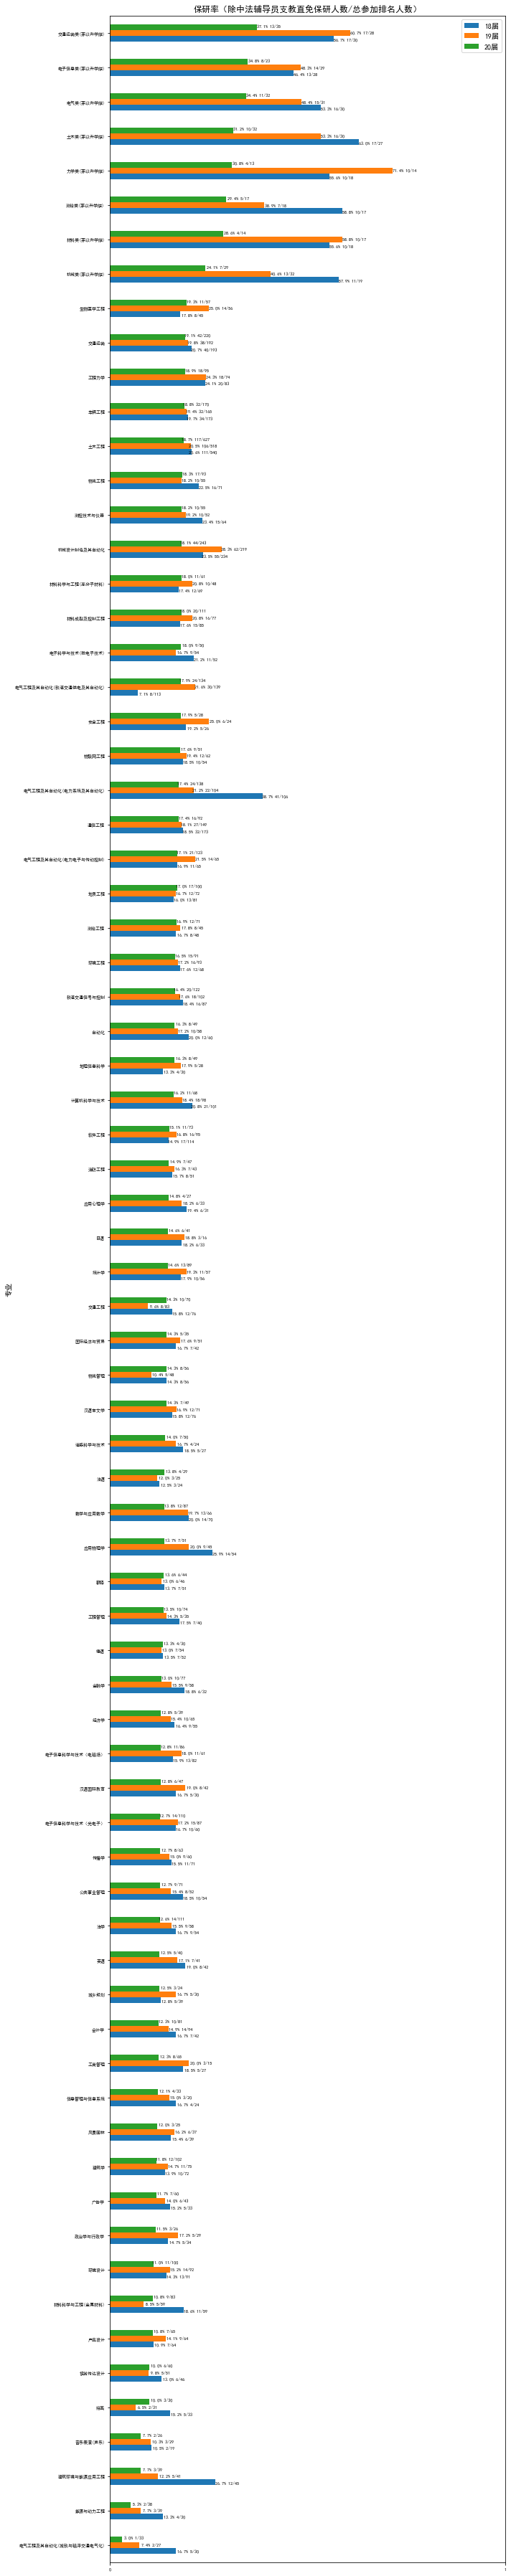

In [17]:
zhuanye18=df18.loc[index,['除中法辅导员支教直免保研率','保研注释']]
zhuanye19=df19.loc[index,['除中法辅导员支教直免保研率','保研注释']]
zhuanye20=df20.loc[index,['除中法辅导员支教直免保研率','保研注释']]
data = pd.concat([zhuanye18,zhuanye19,zhuanye20],axis=1)
data.columns=['18届','18届注释','19届','19届注释','20届','20届注释']
data.sort_values("20届",inplace=True)
ax=data[["18届","19届","20届"]].plot(kind='barh',xticks=[0,1],figsize=(10, 50),fontsize=6,title="保研率（除中法辅导员支教直免保研人数/总参加排名人数）")
for i,value,annotation in zip(range(data.shape[0]),data['18届'],data['18届注释']):
    plt.text(value+0.03,i-0.2 , "{:.1f}% {}".format(value*100,annotation), ha='center', va= 'center',fontsize=6)
for i,value,annotation in zip(range(data.shape[0]),data['19届'],data['19届注释']):
    plt.text(value+0.03,i , "{:.1f}% {}".format(value*100,annotation), ha='center', va= 'center',fontsize=6)
for i,value,annotation in zip(range(data.shape[0]),data['20届'],data['20届注释']):
    plt.text(value+0.03,i+0.2 , "{:.1f}% {}".format(value*100,annotation), ha='center', va= 'center',fontsize=6)
plt.tight_layout()
ax.get_figure().savefig("原图/各专业正常保研18-20届.png",dpi=300)

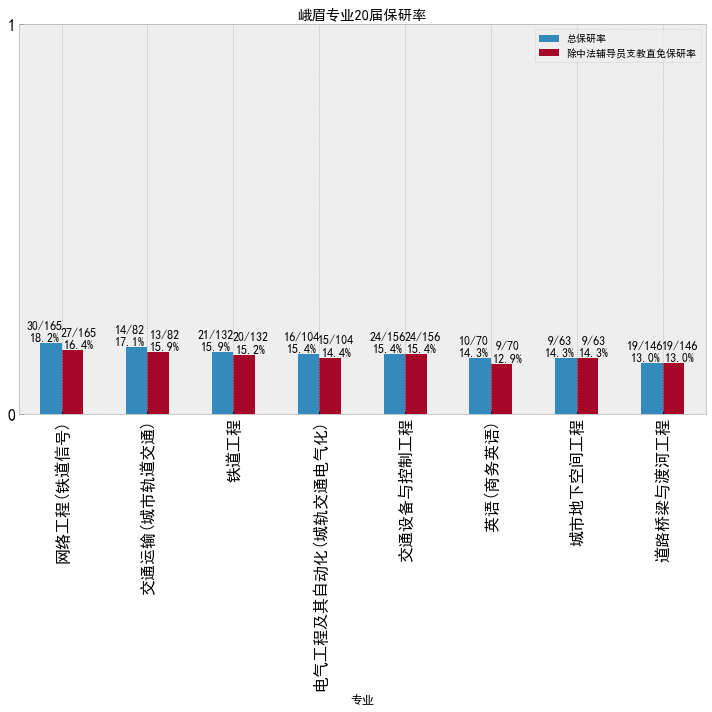

In [18]:
emei_major=['铁道工程','交通运输(城市轨道交通)','电气工程及其自动化(城轨交通电气化)','道路桥梁与渡河工程','英语(商务英语)','城市地下空间工程','交通设备与控制工程','网络工程(铁道信号)']
data=df20.loc[emei_major,['总保研率','总保研注释','除中法辅导员支教直免保研率','保研注释']]
data.sort_values("总保研率",ascending=False,inplace= True)
with plt.style.context('bmh'):
    ax=data[["总保研率",'除中法辅导员支教直免保研率']].plot(kind='bar',yticks=[0,1],figsize=(10, 10),fontsize=16,title="峨眉专业20届保研率")
for i,value,annotation in zip(range(data.shape[0]),data['总保研率'],data['总保研注释']):
    plt.text(i-0.2,value+0.03, "{}\n{:.1f}%".format(annotation,value*100), ha='center', va= 'center',fontsize=12)
for i,value,annotation in zip(range(data.shape[0]),data['除中法辅导员支教直免保研率'],data['保研注释']):
    plt.text(i+0.2,value+0.03, "{}\n{:.1f}%".format(annotation,value*100), ha='center', va= 'center',fontsize=12)
plt.tight_layout()
ax.get_figure().savefig("原图/峨眉20届专业保研.png",dpi=300)

In [19]:
xueyuan18=df18[["总保研人数","参加排名人数","除中法辅导员支教直免保研人数"]].groupby(df18["学院"]).sum()
xueyuan19=df19[["总保研人数","参加排名人数","除中法辅导员支教直免保研人数"]].groupby(df19["学院"]).sum()
xueyuan20=df20[["总保研人数","参加排名人数","除中法辅导员支教直免保研人数","非强制校内","强制校内"]].groupby(df20["学院"]).sum()
index = list(set(xueyuan18.index) & set(xueyuan19.index) & set(xueyuan20.index))

In [20]:
df=xueyuan18
df["总保研率"]=df["总保研人数"]/df["参加排名人数"]
df["除中法辅导员支教直免保研率"]=df["除中法辅导员支教直免保研人数"]/df["参加排名人数"]
df["总保研注释"]=df['总保研人数'].astype(str).str.cat(df['参加排名人数'].astype(str),sep="/")
df["保研注释"]=df['除中法辅导员支教直免保研人数'].astype(str).str.cat(df['参加排名人数'].astype(str),sep="/")
xueyuan18=df
df=xueyuan19
df["总保研率"]=df["总保研人数"]/df["参加排名人数"]
df["除中法辅导员支教直免保研率"]=df["除中法辅导员支教直免保研人数"]/df["参加排名人数"]
df["总保研注释"]=df['总保研人数'].astype(str).str.cat(df['参加排名人数'].astype(str),sep="/")
df["保研注释"]=df['除中法辅导员支教直免保研人数'].astype(str).str.cat(df['参加排名人数'].astype(str),sep="/")
xueyuan19=df
df=xueyuan20
df["总保研率"]=df["总保研人数"]/df["参加排名人数"]
df["除中法辅导员支教直免保研率"]=df["除中法辅导员支教直免保研人数"]/df["参加排名人数"]
df["非强制校内保研率"]=df["非强制校内"]/df["参加排名人数"]
df["总保研注释"]=df['总保研人数'].astype(str).str.cat(df['参加排名人数'].astype(str),sep="/")
df["保研注释"]=df['除中法辅导员支教直免保研人数'].astype(str).str.cat(df['参加排名人数'].astype(str),sep="/")
xueyuan20=df

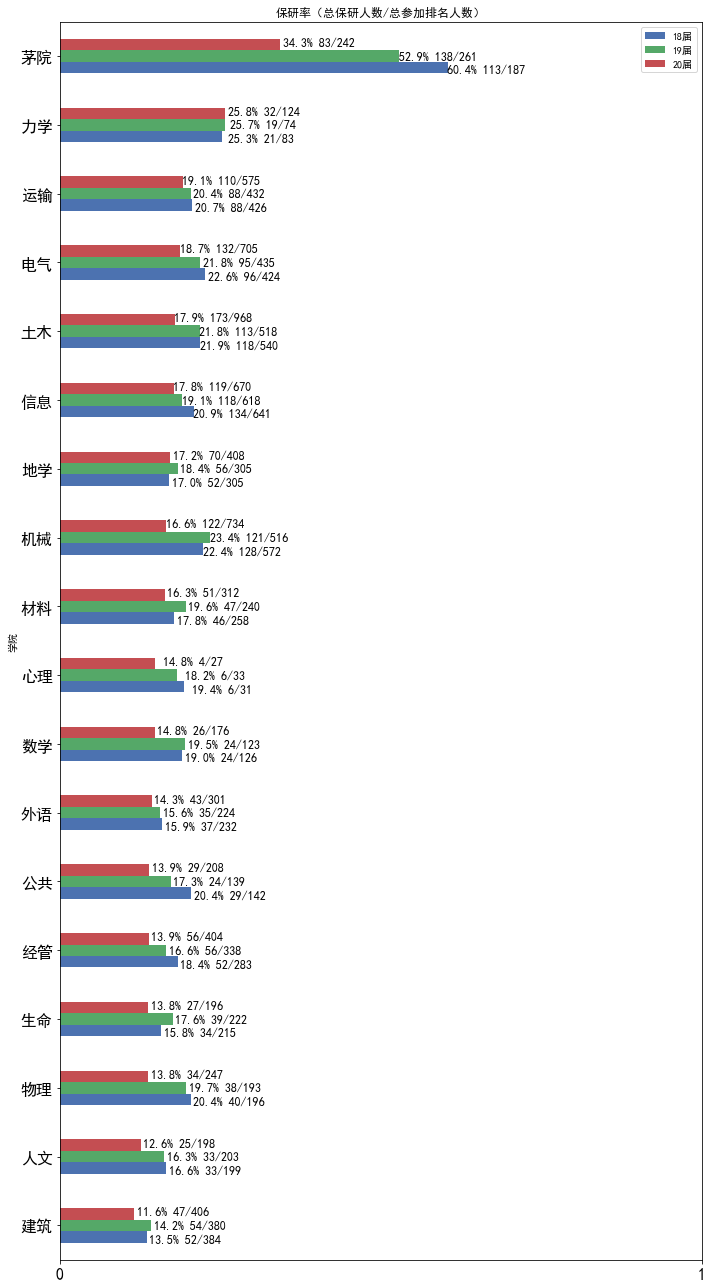

In [21]:
data = pd.concat([xueyuan18.loc[index,["总保研率",'总保研注释']],xueyuan19.loc[index,["总保研率",'总保研注释']],xueyuan20.loc[index,["总保研率",'总保研注释']]],axis=1)
data.columns=['18届','18届注释','19届','19届注释','20届','20届注释']
data.sort_values("20届",inplace=True)
import seaborn
with plt.style.context('seaborn-deep'):
    ax=data[["18届","19届","20届"]].plot(kind='barh',xticks=[0,1],figsize=(10, 18),fontsize=16,title="保研率（总保研人数/总参加排名人数）")
for i,value,annotation in zip(range(data.shape[0]),data['18届'],data['18届注释']):
    plt.text(value+0.06,i-0.2 , "{:.1f}% {}".format(value*100,annotation), ha='center', va= 'center',fontsize=12)
for i,value,annotation in zip(range(data.shape[0]),data['19届'],data['19届注释']):
    plt.text(value+0.06,i , "{:.1f}% {}".format(value*100,annotation), ha='center', va= 'center',fontsize=12)
for i,value,annotation in zip(range(data.shape[0]),data['20届'],data['20届注释']):
    plt.text(value+0.06,i+0.2 , "{:.1f}% {}".format(value*100,annotation), ha='center', va= 'center',fontsize=12)
plt.tight_layout()
ax.get_figure().savefig("原图/各学院总保研18-20届.png",dpi=300)

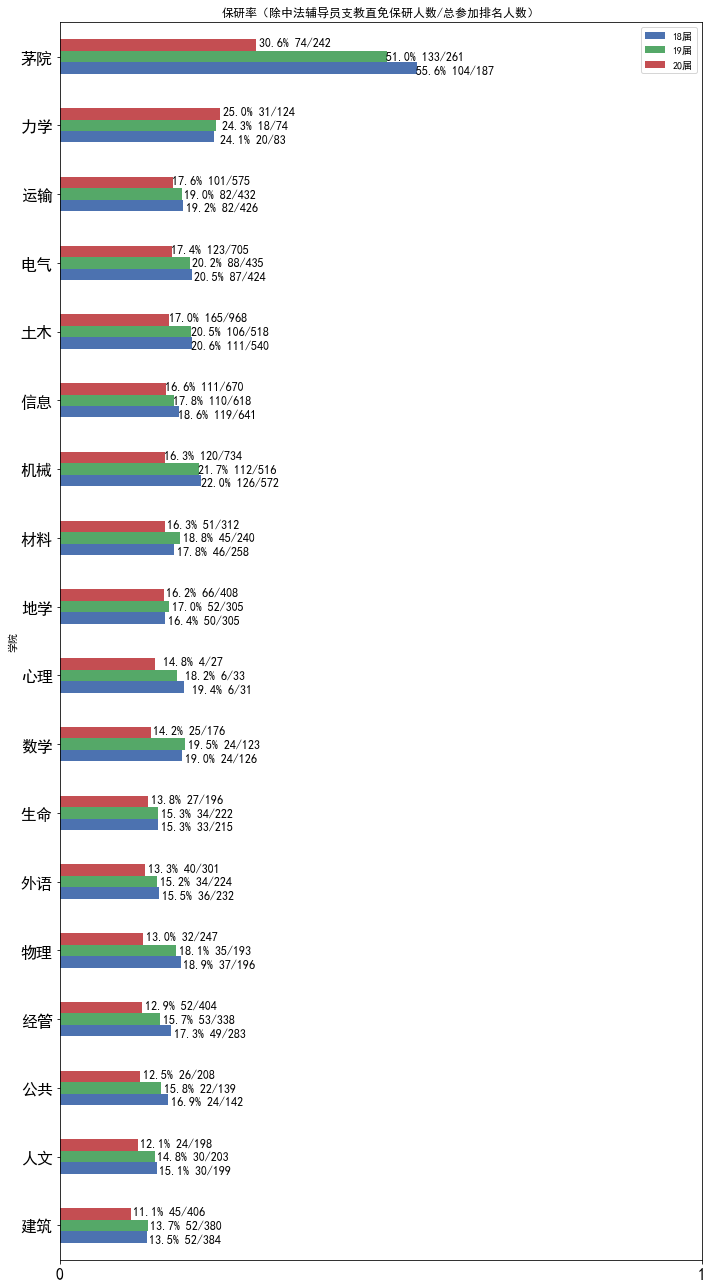

In [22]:
data = pd.concat([xueyuan18.loc[index,['除中法辅导员支教直免保研率','保研注释']],xueyuan19.loc[index,['除中法辅导员支教直免保研率','保研注释']],xueyuan20.loc[index,['除中法辅导员支教直免保研率','保研注释']]],axis=1)
data.columns=['18届','18届注释','19届','19届注释','20届','20届注释']
data.sort_values("20届",inplace=True)
import seaborn
with plt.style.context('seaborn-deep'):
    ax=data[["18届","19届","20届"]].plot(kind='barh',xticks=[0,1],figsize=(10, 18),fontsize=16,title="保研率（除中法辅导员支教直免保研人数/总参加排名人数）")
for i,value,annotation in zip(range(data.shape[0]),data['18届'],data['18届注释']):
    plt.text(value+0.06,i-0.2 , "{:.1f}% {}".format(value*100,annotation), ha='center', va= 'center',fontsize=12)
for i,value,annotation in zip(range(data.shape[0]),data['19届'],data['19届注释']):
    plt.text(value+0.06,i , "{:.1f}% {}".format(value*100,annotation), ha='center', va= 'center',fontsize=12)
for i,value,annotation in zip(range(data.shape[0]),data['20届'],data['20届注释']):
    plt.text(value+0.06,i+0.2 , "{:.1f}% {}".format(value*100,annotation), ha='center', va= 'center',fontsize=12)
plt.tight_layout()
ax.get_figure().savefig("原图/各学院正常保研18-20届.png",dpi=300)

In [23]:
majors_out=list((set(df18.index) | set(df19.index) | set(df20.index)) - (set(df18.index) & set(df19.index) & set(df20.index))-set(emei_major))

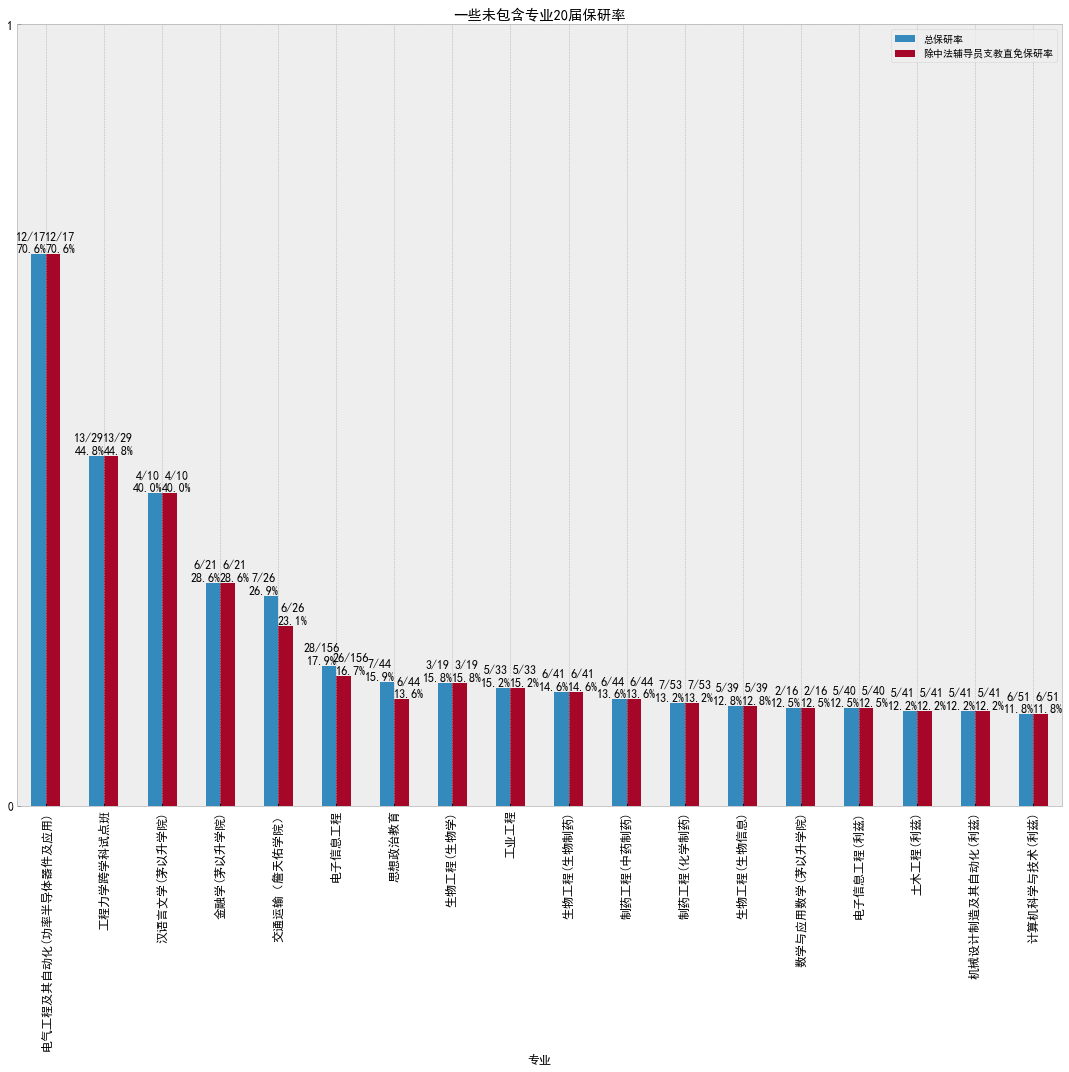

In [24]:
data=df20.loc[df20.index.isin(majors_out),['总保研率','总保研注释','除中法辅导员支教直免保研率','保研注释']]
data.sort_values("总保研率",ascending=False,inplace= True)
with plt.style.context('bmh'):
    ax=data[["总保研率",'除中法辅导员支教直免保研率']].plot(kind='bar',yticks=[0,1],figsize=(15, 15),fontsize=12,title="一些未包含专业20届保研率")
for i,value,annotation in zip(range(data.shape[0]),data['总保研率'],data['总保研注释']):
    plt.text(i-0.25,value+0.015, "{}\n{:.1f}%".format(annotation,value*100), ha='center', va= 'center',fontsize=12)
for i,value,annotation in zip(range(data.shape[0]),data['除中法辅导员支教直免保研率'],data['保研注释']):
    plt.text(i+0.25,value+0.015, "{}\n{:.1f}%".format(annotation,value*100), ha='center', va= 'center',fontsize=12)
plt.tight_layout()
ax.get_figure().savefig("原图/一些未包含专业20届保研.png",dpi=300)

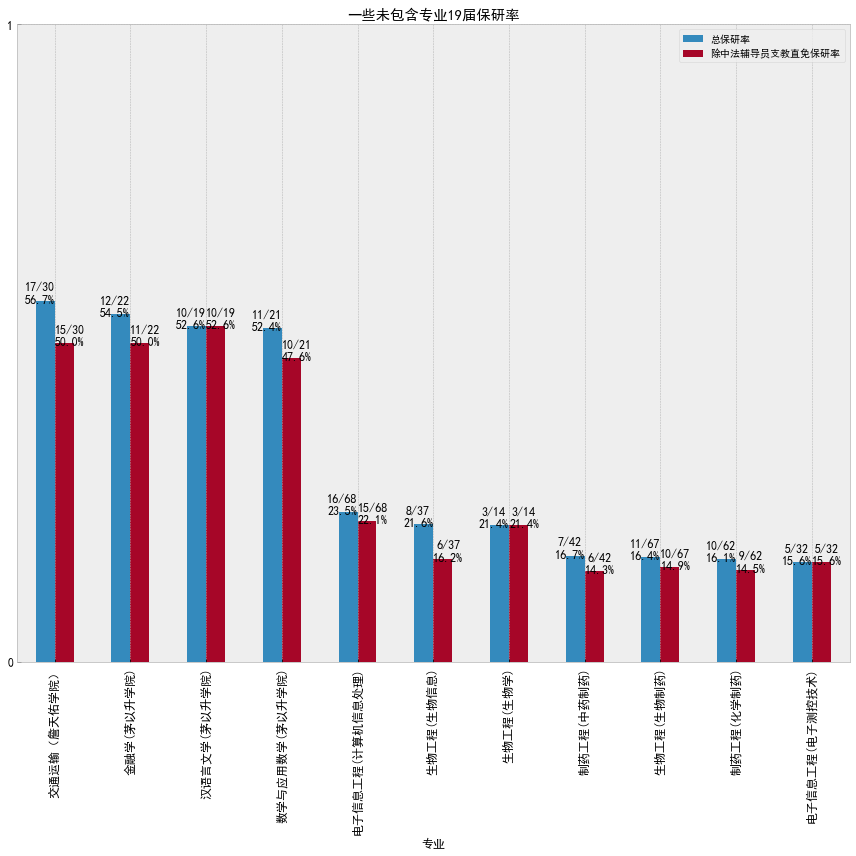

In [25]:
data=df19.loc[df19.index.isin(majors_out),["总保研率",'总保研注释','除中法辅导员支教直免保研率','保研注释']]
data.sort_values("总保研率",ascending=False,inplace= True)
with plt.style.context('bmh'):
    ax=data[["总保研率",'除中法辅导员支教直免保研率']].plot(kind='bar',yticks=[0,1],figsize=(12, 12),fontsize=12,title="一些未包含专业19届保研率")
for i,value,annotation in zip(range(data.shape[0]),data['总保研率'],data['总保研注释']):
    plt.text(i-0.2,value+0.012, "{}\n{:.1f}%".format(annotation,value*100), ha='center', va= 'center',fontsize=12)
for i,value,annotation in zip(range(data.shape[0]),data['除中法辅导员支教直免保研率'],data['保研注释']):
    plt.text(i+0.2,value+0.012, "{}\n{:.1f}%".format(annotation,value*100), ha='center', va= 'center',fontsize=12)
plt.tight_layout()
ax.get_figure().savefig("原图/一些未包含专业19届保研.png",dpi=300)

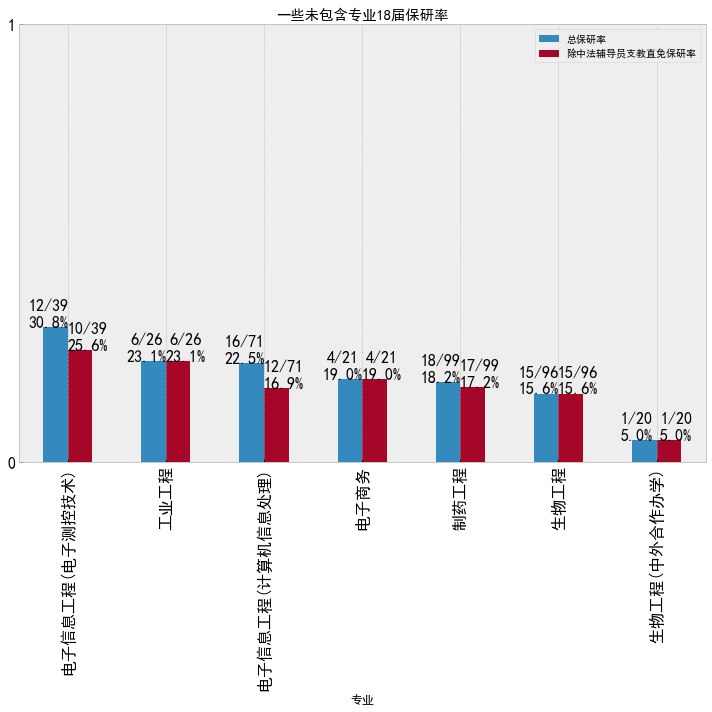

In [26]:
data=df18.loc[df18.index.isin(majors_out),["总保研率",'总保研注释','除中法辅导员支教直免保研率','保研注释']]
data.sort_values("总保研率",ascending=False,inplace= True)
with plt.style.context('bmh'):
    ax=data[["总保研率",'除中法辅导员支教直免保研率']].plot(kind='bar',yticks=[0,1],figsize=(10,10),fontsize=16,title="一些未包含专业18届保研率")
for i,value,annotation in zip(range(data.shape[0]),data['总保研率'],data['总保研注释']):
    plt.text(i-0.2,value+0.03, "{}\n{:.1f}%".format(annotation,value*100), ha='center', va= 'center',fontsize=16)
for i,value,annotation in zip(range(data.shape[0]),data['除中法辅导员支教直免保研率'],data['保研注释']):
    plt.text(i+0.2,value+0.03, "{}\n{:.1f}%".format(annotation,value*100), ha='center', va= 'center',fontsize=16)
plt.tight_layout()
ax.get_figure().savefig("原图/一些未包含专业18届保研.png",dpi=300)

In [27]:
(set(df18["学院"]) | set(df19["学院"]) | set(df20["学院"]))-(set(df18["学院"]) & set(df19["学院"]) & set(df20["学院"]))

{'利兹', '马院'}

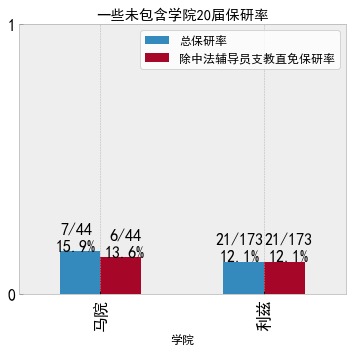

In [28]:
data=xueyuan20.loc[['利兹', '马院'],["总保研率",'总保研注释','除中法辅导员支教直免保研率','保研注释']]
data.sort_values("总保研率",ascending=False,inplace= True)
with plt.style.context('bmh'):
    ax=data[["总保研率",'除中法辅导员支教直免保研率']].plot(kind='bar',yticks=[0,1],figsize=(5, 5),fontsize=16,title="一些未包含学院20届保研率")
for i,value,annotation in zip(range(data.shape[0]),data['总保研率'],data['总保研注释']):
    plt.text(i-0.15,value+0.05, "{}\n{:.1f}%".format(annotation,value*100), ha='center', va= 'center',fontsize=16)
for i,value,annotation in zip(range(data.shape[0]),data['除中法辅导员支教直免保研率'],data['保研注释']):
    plt.text(i+0.15,value+0.05, "{}\n{:.1f}%".format(annotation,value*100), ha='center', va= 'center',fontsize=16)
plt.legend(prop={'size':12})
plt.xlabel('学院',fontsize=12)
plt.tight_layout()
ax.get_figure().savefig("原图/一些未包含学院20届保研率.png",dpi=300)

In [29]:
baoyanlv1=[df18["总保研人数"].sum()/df18["参加排名人数"].sum(),
df19["总保研人数"].sum()/df19["参加排名人数"].sum(),
df20["总保研人数"].sum()/df20["参加排名人数"].sum()]
annotations1=[f'{df18["总保研人数"].sum()}/{df18["参加排名人数"].sum()}',f'{df19["总保研人数"].sum()}/{df19["参加排名人数"].sum()}',
f'{df20["总保研人数"].sum()}/{df20["参加排名人数"].sum()}']

baoyanlv2=[df18["除中法辅导员支教直免保研人数"].sum()/df18["参加排名人数"].sum(),
df19["除中法辅导员支教直免保研人数"].sum()/df19["参加排名人数"].sum(),
df20["除中法辅导员支教直免保研人数"].sum()/df20["参加排名人数"].sum()]
annotations2=[f'{df18["除中法辅导员支教直免保研人数"].sum()}/{df18["参加排名人数"].sum()}',f'{df19["除中法辅导员支教直免保研人数"].sum()}/{df19["参加排名人数"].sum()}',
f'{df20["除中法辅导员支教直免保研人数"].sum()}/{df20["参加排名人数"].sum()}']

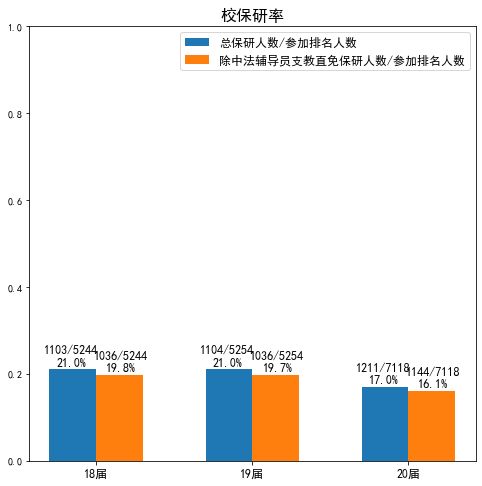

In [30]:
plt.figure(figsize=(8,8))
bar1=plt.bar([i-0.15 for i in range(len(baoyanlv1))],baoyanlv1,width=0.3)
bar2=plt.bar([i+0.15 for i in range(len(baoyanlv2))],baoyanlv2,width=0.3)
plt.xticks([0,1,2],['18届','19届','20届'],fontsize=12)
plt.ylim(0, 1)
plt.title("校保研率",fontsize=16)
for i,value,annotation in zip(range(len(baoyanlv1)),baoyanlv1,annotations1):
    plt.text(i-0.16,value+0.03, "{}\n{:.1f}%".format(annotation,value*100), ha='center', va= 'center',fontsize=12)
for i,value,annotation in zip(range(len(baoyanlv2)),baoyanlv2,annotations2):
    plt.text(i+0.16,value+0.03, "{}\n{:.1f}%".format(annotation,value*100), ha='center', va= 'center',fontsize=12)
plt.legend(handles = [bar1, bar2], labels = ['总保研人数/参加排名人数', '除中法辅导员支教直免保研人数/参加排名人数'], loc = 'best',prop={'size':12})
plt.savefig("原图/校保研率.png",dpi=300)

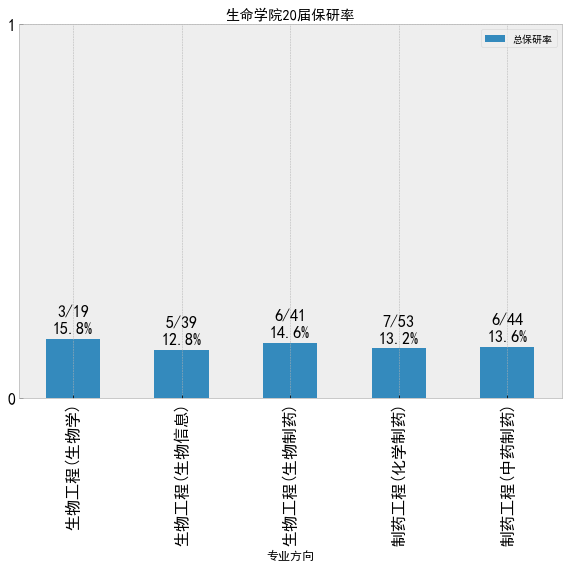

In [31]:
shengming20=df20.loc[['生物工程(生物学)', '生物工程(生物信息)','生物工程(生物制药)',
'制药工程(化学制药)','制药工程(中药制药)']][['总保研率','总保研注释']]
data=shengming20
with plt.style.context('bmh'):
    ax=data.plot(kind='bar',yticks=[0,1],figsize=(8, 8),fontsize=16,title="生命学院20届保研率")
for i,value,annotation in zip(range(data.shape[0]),data['总保研率'],data['总保研注释']):
    plt.text(i,value+0.05, "{}\n{:.1f}%".format(annotation,value*100), ha='center', va= 'center',fontsize=16)
plt.xlabel('专业方向',fontsize=12)
plt.tight_layout()
ax.get_figure().savefig("原图/生命学院20届保研率.png",dpi=300)